In [1]:
# Importing our libraries 
# ---
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn import tree

In [2]:
# Load the data below
# --- 
# Dataset url = : : https://bit.ly/2XZK7Bo

# --- 
Sub_Churn = pd.read_csv('https://bit.ly/2XZK7Bo')
Sub_Churn.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1


In [3]:

# Sample 10 rows of data
# ---
#
Sub_Churn.sample(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7205,7206,15592914,Fang,683,France,Female,29,9.0,0.00,2,1,1,48849.89,0
2895,2896,15646859,Heydon,621,Germany,Male,47,7.0,107363.29,1,1,1,66799.28,0
612,613,15619857,Crawford,605,France,Female,64,2.0,129555.70,1,1,1,13601.79,0
818,819,15591969,Kuo,497,Spain,Male,27,9.0,75263.16,1,1,1,164825.04,0
1682,1683,15662758,Watson,620,France,Male,41,NaN,97925.11,1,1,0,85000.32,0
3189,3190,15596522,Meredith,692,France,Female,42,2.0,0.00,2,1,0,145222.93,0
4599,4600,15624451,Huddart,641,France,Female,38,3.0,0.00,2,1,0,116466.19,0
2948,2949,15694395,Ts'ui,620,France,Female,29,1.0,138740.24,2,0,0,154700.61,0
6322,6323,15684294,Chidumaga,735,France,Male,50,2.0,0.00,2,0,1,147075.69,0
2485,2486,15659501,Chioke,753,France,Female,38,NaN,142263.45,1,0,1,33730.43,0


In [4]:
# Checking number of rows and columns

Sub_Churn.shape
     

(10000, 14)

In [5]:

Sub_Churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Observation:

The data provided has a shape of 10000 rows and 14 columns.
Geograpghy is mainly in France, spain and Germany with a majority of the gender seamingly being male.

Data Preparation

In [6]:
# Checking missing entries of all the variables. 
pd.DataFrame(Sub_Churn.isnull().sum(), columns=["Number of Missing Values"])

,Number of Missing Values
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,909
Balance,0
NumOfProducts,0


In [7]:
# Changing the column headings to lower case characters.
Sub_Churn.columns = Sub_Churn.columns.str.lower()
Sub_Churn.head()

,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [8]:

# Checking how many duplicate rows are there in the data
# ---
Sub_Churn .duplicated().sum()

0

In [9]:
# Checking if any of the columns are all null
# ---
Sub_Churn.isnull().all(axis = 0)

rownumber          False
customerid         False
surname            False
creditscore        False
geography          False
gender             False
age                False
tenure             False
balance            False
numofproducts      False
hascrcard          False
isactivemember     False
estimatedsalary    False
exited             False
dtype: bool

In [10]:

# Checking if any of the rows are all null
# ---
sum(Sub_Churn.isnull().all(axis = 1))

0

In [11]:
#fixing Missing values in tenure
Sub_Churn['tenure'] = Sub_Churn['tenure'].fillna(0)
pd.DataFrame(Sub_Churn.isnull().sum(), columns=["Number of Missing Values"])

,Number of Missing Values
rownumber,0
customerid,0
surname,0
creditscore,0
geography,0
gender,0
age,0
tenure,0
balance,0
numofproducts,0


In [12]:

import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import f1_score

In [13]:
#Geography and Gender columns housed categorical values, so we need to change that as Machine Learning Models take only numerical values
## Drop irrelevant columns

Sub_Churn = Sub_Churn.drop(['rownumber', 'customerid', 'surname'], axis = 1 )

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

Sub_Churn["gender"] = le.fit_transform(Sub_Churn["gender"])
Sub_Churn["geography"] = le.fit_transform(Sub_Churn["geography"])
Sub_Churn.head()

,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,619,0,0,42,2.0,0.00,1,1,1,101348.88,1
1,608,2,0,41,1.0,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8.0,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1.0,0.00,2,0,0,93826.63,0
4,850,2,0,43,2.0,125510.82,1,1,1,79084.10,0


In [14]:
#Splitting the dataframe
X = Sub_Churn.drop("exited", axis = 1)
y = Sub_Churn["exited"]

X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.2, random_state = 0)

print('X_train has', X_train.shape[0], 'rows, y_train also has', y_train.shape[0], 'rows')

print('X_test has', X_test.shape[0], 'rows, y_test also has', y_test.shape[0], 'rows')

X_train has 8000 rows, y_train also has 8000 rows
X_test has 2000 rows, y_test also has 2000 rows


Comparing Acuracy

In [15]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()


model.fit(X_train, y_train)


model_y_pred = model.predict(X_test)

# Accuracy Score
model_score = accuracy_score(model_y_pred, y_test)
print(model_score)

0.789


In [18]:
print(classification_report(y_test, model_y_pred))

              precision    recall  f1-score   support

           0       0.80      0.97      0.88      1595
           1       0.37      0.06      0.11       405

    accuracy                           0.79      2000
   macro avg       0.59      0.52      0.49      2000
weighted avg       0.72      0.79      0.72      2000



In [16]:
#Random Forest
rf = RandomForestClassifier(n_estimators = 15, random_state = 200)


rf.fit(X_train, y_train)


rf_y_pred = rf.predict(X_test)

#  Accuracy Score
rf_score = accuracy_score(rf_y_pred, y_test)
rf_score


0.8615

In [19]:
print(classification_report(y_test, rf_y_pred))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1595
           1       0.72      0.52      0.60       405

    accuracy                           0.86      2000
   macro avg       0.80      0.73      0.76      2000
weighted avg       0.85      0.86      0.85      2000



In [17]:
#Decision Tree Classifier
dt = tree.DecisionTreeClassifier()


dt.fit(X_train, y_train)


dt_y_pred = dt.predict(X_test)

# Accuracy Score
dt_score = accuracy_score(dt_y_pred, y_test)
print(dt_score)

0.782


In [20]:
print(classification_report(y_test, dt_y_pred))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86      1595
           1       0.47      0.54      0.50       405

    accuracy                           0.78      2000
   macro avg       0.67      0.69      0.68      2000
weighted avg       0.79      0.78      0.79      2000



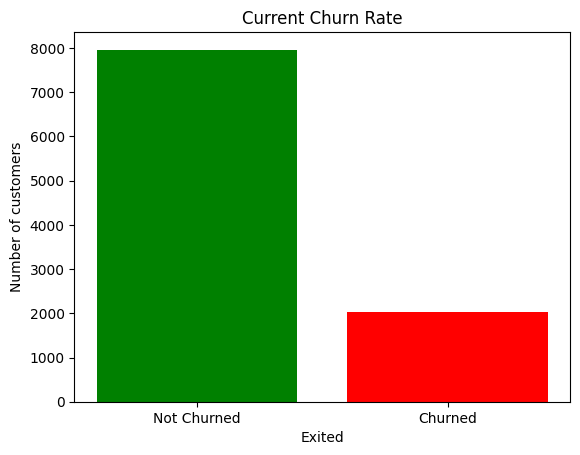

In [34]:
import matplotlib.pyplot as plt

# Plot current churn rate
current_churn = [len(Sub_Churn[Sub_Churn['exited'] == 0]), len(Sub_Churn[Sub_Churn['exited'] == 1])]
colors = ['green', 'red']
plt.bar(['Not Churned', 'Churned'], current_churn, color=colors)
plt.title('Current Churn Rate')
plt.xlabel('Exited')
plt.ylabel('Number of customers')
plt.show()











From the above its evident that roughly 2% left or rather 2000 subs churned.

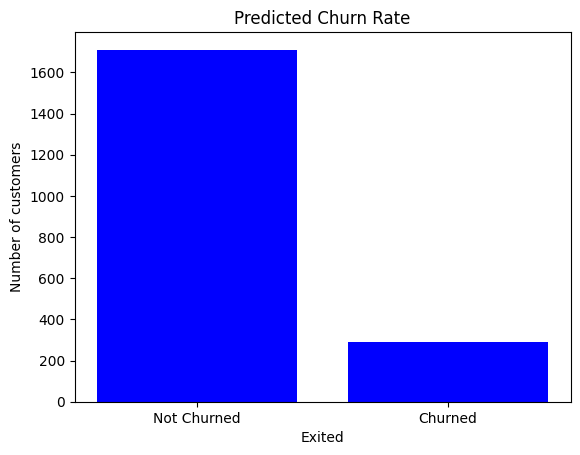

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Get indices of customers who churned and who did not churn
not_churned_indices = np.where(rf_y_pred < 0.5)[0]
churned_indices = np.where(rf_y_pred >= 0.5)[0]

# Calculate number of customers who churned and who did not churn
not_churned_count = len(not_churned_indices)
churned_count = len(churned_indices)

# Plot predicted churn rate
plt.bar(['Not Churned', 'Churned'], [not_churned_count, churned_count], color='blue')
plt.title('Predicted Churn Rate')
plt.xlabel('Exited')
plt.ylabel('Number of customers')
plt.show()
